In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_path = '../../data/X.txt'
y_path = '../../data/Y.txt'

In [3]:
x=pd.read_csv(x_path,sep=';')
y=pd.read_csv(y_path,sep=';')

In [4]:
x.head()

,Year,IsDayBin,Month,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,2016,Night,1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,2016,Night,1,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,2016,Night,1,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,2016,Night,1,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,2016,Night,1,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


In [5]:
x.shape

(26304, 14)

In [6]:
y.head()

,WindPower,PVPower
R1,396.352,0.0
R2,417.778,0.0
R3,434.581,0.0
R4,448.482,0.0
R5,465.790,0.0


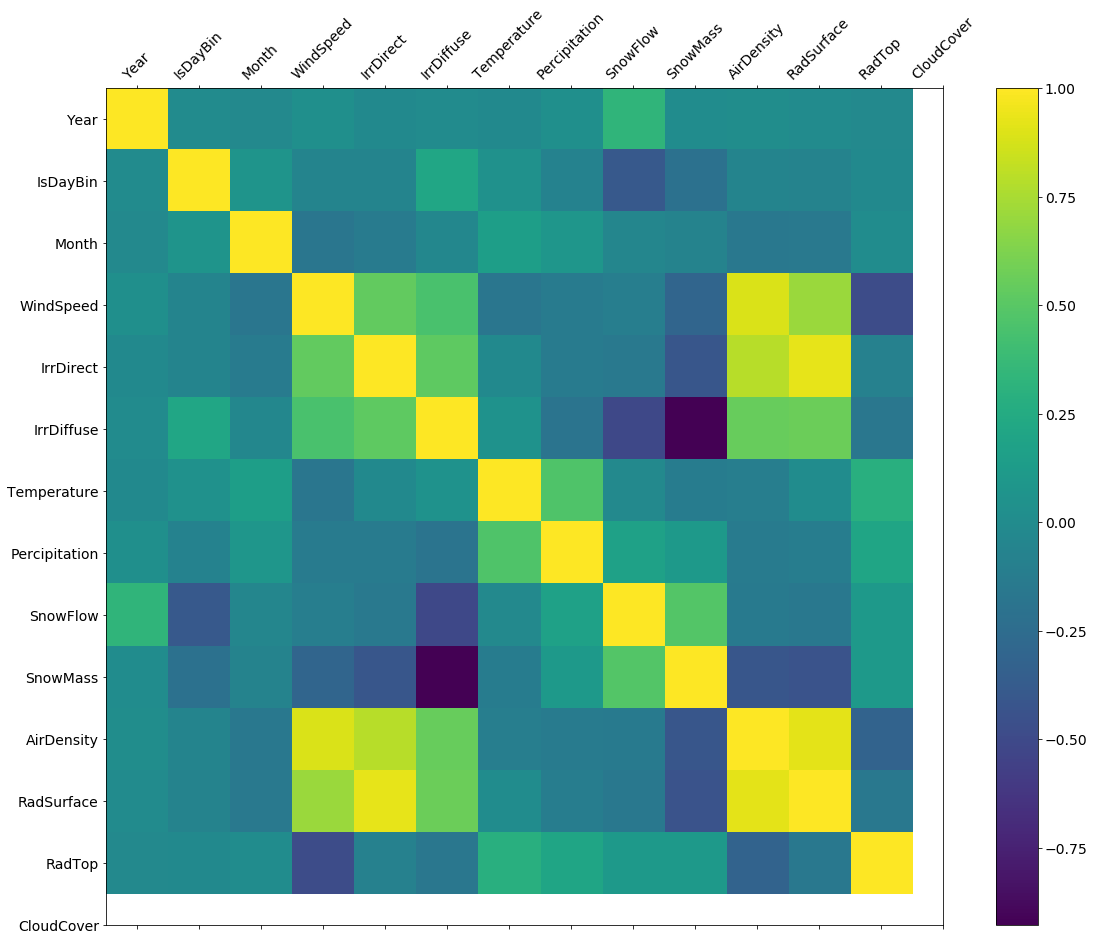

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.shape[1]), x.columns, fontsize=14, rotation=45)
plt.yticks(range(x.shape[1]), x.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [8]:
x['IsDayBin'].unique()

array(['Night', 'Day'], dtype=object)

In [9]:
X=x.drop(['Year','IsDayBin','Month'],axis=1)
Y=y.drop(['WindPower'],axis=1)

In [10]:
X.head()

,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


In [11]:
#Check the range and order of magniturde. Do we need to scale ?
max(x['CloudCover'].unique())

1.0

# Converting dataframes to numpy array 

In [12]:
X=X.values
Y=Y.values

# Scale the dataset

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [14]:
#X_padded = np.column_stack((np.ones((len(X_scaled),1)), X_scaled))
X_padded = X_scaled

# Split the dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_padded,Y,test_size=0.5,random_state=42)

# Using SKLEARN library

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
print(reg.coef_)

[[ 4.51715705e-01  2.48703286e+02  9.13105643e+01 -6.17783901e+00
   9.94548811e-01 -1.12207863e+00  9.27782129e-02 -4.90684542e-01
  -3.74460972e+01 -1.40193153e+01  6.03757691e-01]]


In [17]:
y_predict = reg.predict(X_test)

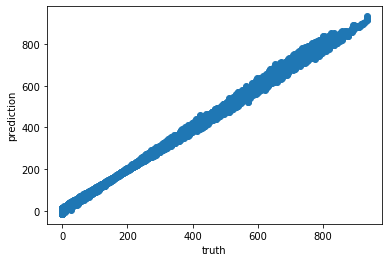

In [18]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_predict)
plt.xlabel('truth')
plt.ylabel('prediction');

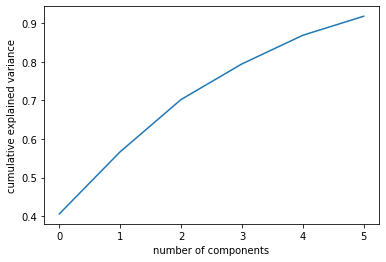

In [62]:
from sklearn.decomposition import PCA
pca = PCA(6).fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [63]:
P=pca.components_
T = X_train.dot(P.T)

First component  [-0.07118599  0.38158456  0.39044395  0.37715303 -0.04737328 -0.11409366
 -0.18107559 -0.3204416   0.43788638  0.42866865 -0.16852541]


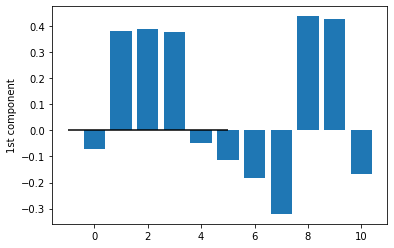

In [64]:
#WindSpeed	IrrDirect	IrrDiffuse	Temperature	Percipitation	SnowFlow	SnowMass	AirDensity	RadSurface	RadTop	CloudCover
print("First component ", P.T[:,0])
x = np.arange(X_scaled.shape[1])
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
plt.ylabel("1st component")
plt.show()

In [65]:
T.shape

(13152, 6)

[[105.90366192 -60.82263039  40.20002892  44.5167236   24.12544413
  -20.43547046]]


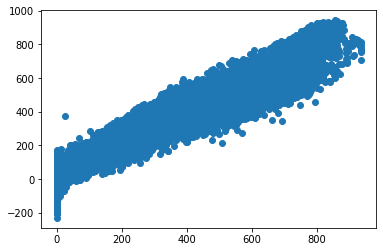

In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(T, Y_train)
print(reg.coef_)
y_predict = reg.predict(X_test.dot(P.T))
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_predict)

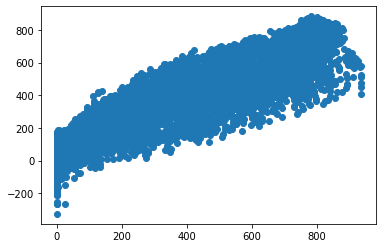

In [80]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=1)
pls2.fit(X_train, Y_train)
PLSRegression()
y_predict = pls2.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(Y_test,y_predict)

In [81]:
T = pls2.x_scores_
U = pls2.y_scores_
W = pls2.x_weights_
C = pls2.y_weights_
P = pls2.x_loadings_
Q = pls2.y_loadings_

In [82]:
print(T.shape,U.shape,W.shape,C.shape,P.shape,Q.shape)

(13152, 1) (13152, 1) (11, 1) (1, 1) (11, 1) (1, 1)


First component  [-0.08958109  0.4231529   0.40173382  0.34203072 -0.07323976 -0.1135282
 -0.13238623 -0.27510767  0.46745041  0.44715317 -0.20035522]


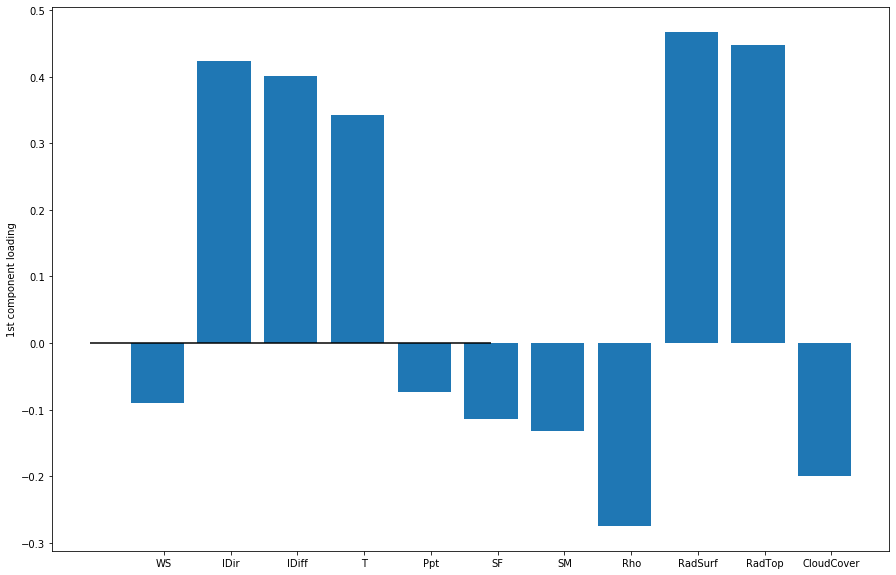

In [83]:
#Loading of the first component
#WindSpeed	IrrDirect	IrrDiffuse	Temperature	Percipitation	SnowFlow	SnowMass	AirDensity	RadSurface	RadTop	CloudCover
print("First component ", P[:,0])
x = np.arange(X_scaled.shape[1])
plt.figure(figsize=(15,10))
plt.bar(x, height= P[:,0])
plt.hlines(0,-1,5)
plt.xticks(x+.1, ['WS','IDir','IDiff','T','Ppt','SF','SM','Rho','RadSurf','RadTop','CloudCover'])
plt.ylabel("1st component loading")
plt.show()

In [71]:
X_scaled.shape[1]

11